# Visualization (시각화)
> 데이터분석 및 보고에 필요한 시각화 패키지를 알아보고 실제 데이터로 시각화 예제를 다루어봅니다.  
데이터 시각화는 데이터분석 과정에서 단순히 데이터를 살펴보는데 그치지 않고 다양한 분석 가능성을 보여줍니다.  
또한 3자에게 설명을 함에 있어서도 데이터시각화는 굉장히 설득력있는 리포팅을 가능하게 해줍니다.

## seaborn
> - 많은 데이터분석가들이 주로 사용하는 시각화 라이브러리  
> - 다양한 형태의 시각화도구를 제공. 
> - 기본적인 심미성이 뛰어나 특별한 옵션 설정을 하지 않아도 예쁜 그래프 출력이 가능하다.

In [5]:
# 패키지 설치
# !pip install seaborn

# 패키지 import
import numpy as np # 선형대수학적 벡터연산을 구현 패키지, 수리연산, 통계
import pandas as pd # numpy기반 테이블형태 자료구조 구현
import matplotlib.pyplot as plt # 시각화계의 numpy 
import seaborn as sns # matplotlib 기반 시각화 패키지
plt.rcParams['axes.unicode_minus'] = False # 마이너스 폰트 깨지 해결
plt.rcParams['font.family'] = 'AppleGothic' # 한글폰트 사용시 폰트 설정

In [2]:
# 데이터 로딩
df = pd.read_csv('./data/energy1.csv', encoding='cp949')
df.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


### countplot (막대그래프)
대소비교를 위한 목적으로 사용.  
변수값의 고윳값을 기준으로 대소비를 진행합니다. 고윳값을 카운트 하고 해당 카운트 값을 y축에 표현

In [3]:
df.head()

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0
2,1,2020-06-01 02,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0


In [8]:
df.rename({'전력사용량(kWh)':'전력사용량',
                  '기온(°C)':'기온',
                  '풍속(m/s)':'풍속',
                  '습도(%)':'습도',
                  '강수량(mm)':'강수량',
                  '일조(hr)':'일조'}, axis=1, inplace=True)

<Axes: xlabel='기온', ylabel='count'>

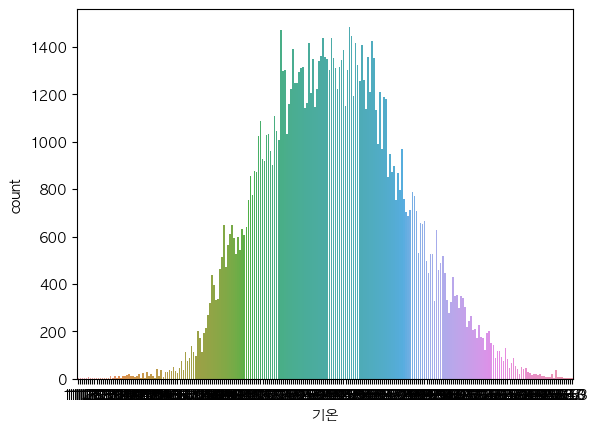

In [9]:
# 쉬운 방법으로 barplot 구현이 가능하다. 카테고리컬 데이터에 적용
sns.countplot(data=df, x='기온')
# data=데이터프레임이름, x='변수명', y='변수명'

### histplot (히스토그램)

<Axes: xlabel='전력사용량', ylabel='Count'>

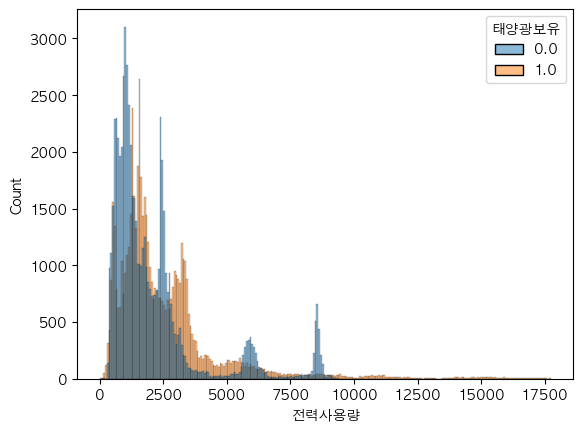

In [25]:
# 연속형데이터의 분포 확인을 위한 목적으로 사용
# 변수의 전체구간을 등구간을 분할 구간에 포함 된 데이터를 매칭
sns.histplot(data=df, x='전력사용량', hue='태양광보유')

### scatterplot (산점도)

<Axes: xlabel='기온', ylabel='전력사용량'>

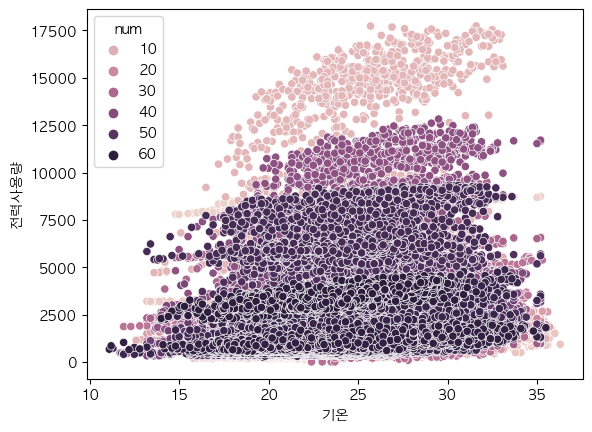

In [26]:
# 관측치 데이터를 점으로 표현
# x축, y축에 각각 변수를 위치 --> 간 변수간 관계를 파악하기 위한 목적으로 사용 (상관관계)
# 변수간 관계, 데이터 분포, 밀도, 이상치 --> 분석툴로 사용
# 2개의 변수는 모두 연속형 best
sns.scatterplot(data=df, x='기온', y='전력사용량', hue='num')
# hue='변수명' 카테고리컬 데이터의 변수를 그룹화 --> 색구분 범례표시

### boxplot

In [ ]:
# scatterplot과 비슷하게 x, y축에 각각 변수를 위치 변수간 관계를 파악하는 용도
# 표현방식 y축에 표현되는 데이터의 분포가 박스 형태로 표시 --> 분포
# x축 데이터가 카테고리컬 데이터, y 연속형
# 이상치를 잘 보여줍니다.

In [ ]:
# 색구분 박스 상단 사분위수 75%, 박스 내부 라인 50% (중앙값), 박스하단 25%
# iqr 사분위수 75%, 25% * 1.5 --> 데이터분포가 일반적으로는 iqr에 포함
# iqr 외부 데이터는 이상치 --> 검정색 마름모

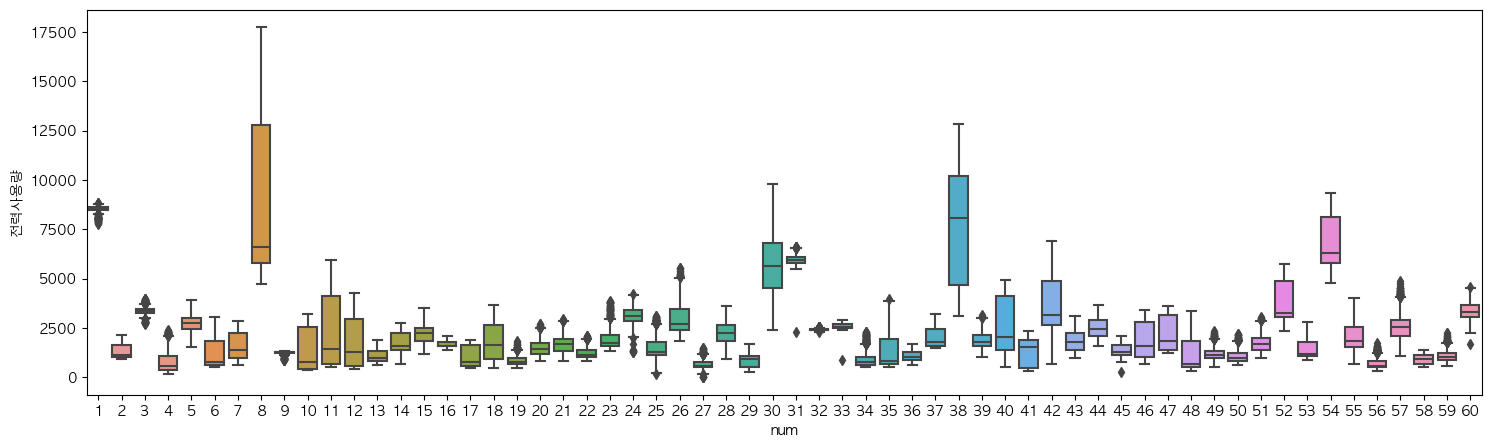

In [28]:
# 굉장히 많이 사용
# 각각의 box하나당 해당 데이터의 사분위수, 중앙값, 최대, 최소값을 표기한다.
plt.figure(figsize=(18, 5))
sns.boxplot(data=df, x='num', y='전력사용량')
plt.show()

### pairplot
> 각 변수간 상관관계를 확인하는 scatterplot의 확장버전  
데이터프레임의 모든 변수에 대한 상관관계를 그리드 형태의 scatter로 표현합니다.

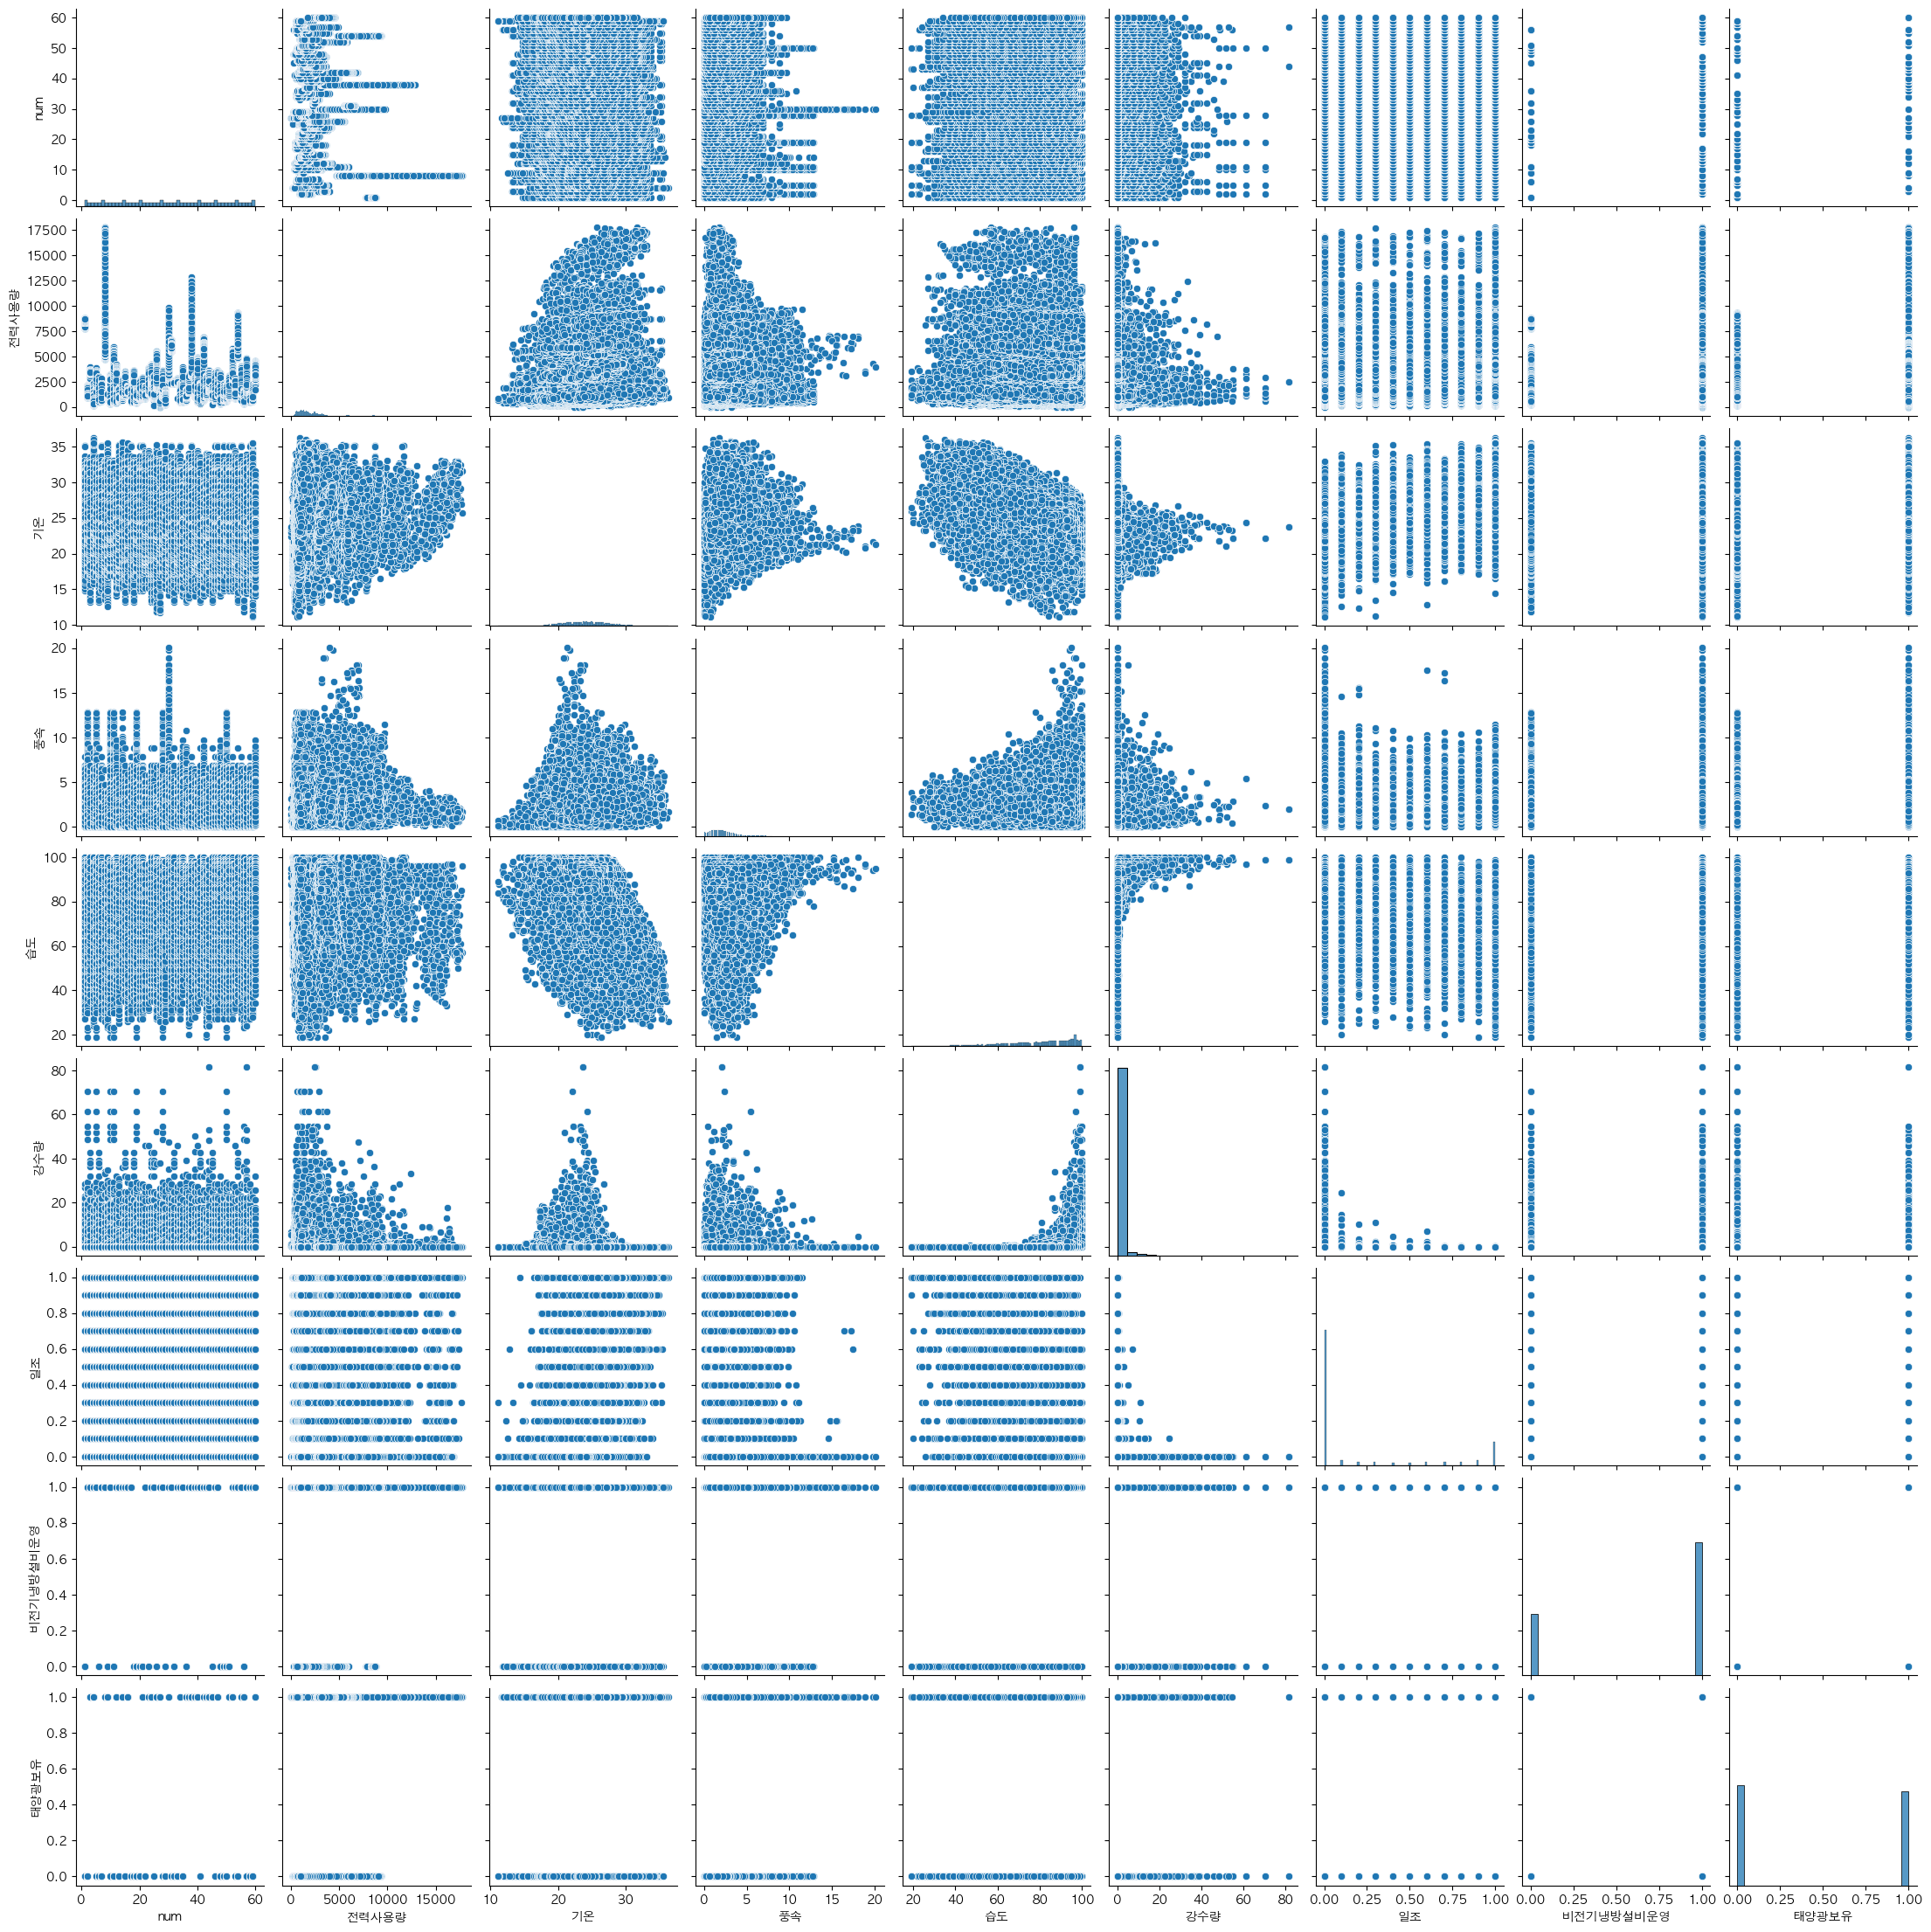

In [31]:
# 각 컬럼간 모든 scatter plot을 그리는 pairplot
sns.pairplot(data=df)

### heatmap
> 각 변수간 상관관계를 모두 확인하고자 하는 목적은 pairplot과 같음  
다만 scatterplot 형태가 아닌 상관계수를 계산하여 열지도로 표현  
각 변수간 관계를 한눈에 보기 좋은 형태

In [33]:
df.corr(numeric_only=True)

,num,전력사용량,기온,풍속,습도,강수량,일조,비전기냉방설비운영,태양광보유
num,1.000000,-0.063193,0.000363,-0.052184,0.005379,-0.004673,-0.013685,0.061031,0.099181
전력사용량,-0.063193,1.000000,0.158361,0.109965,-0.077199,-0.006028,0.112131,0.150799,0.116344
기온,0.000363,0.158361,1.000000,0.167455,-0.509105,-0.093788,0.515657,0.019067,0.025865
풍속,-0.052184,0.109965,0.167455,1.000000,-0.110439,0.083433,0.156381,0.006275,-0.076560
습도,0.005379,-0.077199,-0.509105,-0.110439,1.000000,0.208862,-0.627597,-0.031405,-0.020657
강수량,-0.004673,-0.006028,-0.093788,0.083433,0.208862,1.000000,-0.112646,-0.003560,-0.016685
일조,-0.013685,0.112131,0.515657,0.156381,-0.627597,-0.112646,1.000000,-0.005695,-0.008412
비전기냉방설비운영,0.061031,0.150799,0.019067,0.006275,-0.031405,-0.003560,-0.005695,1.000000,0.084842
태양광보유,0.099181,0.116344,0.025865,-0.076560,-0.020657,-0.016685,-0.008412,0.084842,1.000000


<Axes: >

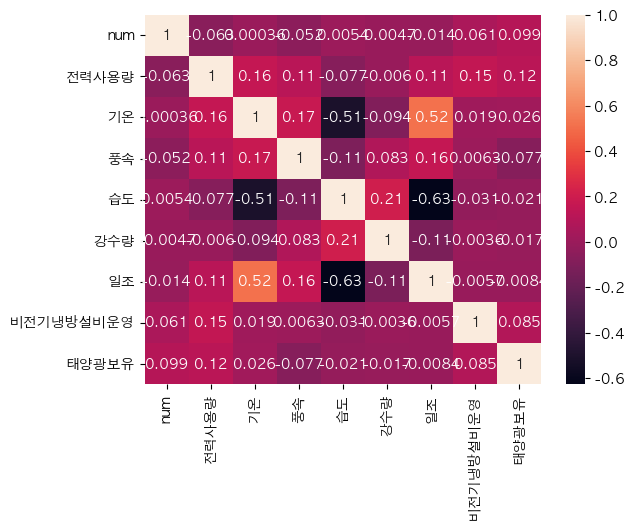

In [35]:
sns.heatmap(data=df.corr(numeric_only=True), annot=True)

In [36]:
df1 = pd.read_csv('./data/energy2.csv', encoding='cp949')
df1.head()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
df1.isna()

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,False,False,False,False,False,False,False,True,True
1,False,False,True,True,True,True,True,True,True
2,False,False,True,True,True,True,True,True,True
3,False,False,False,False,False,True,False,True,True
4,False,False,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...
10075,False,False,True,True,True,True,True,True,True
10076,False,False,True,True,True,True,True,True,True
10077,False,False,False,False,False,True,False,False,False
10078,False,False,True,True,True,True,True,True,True


<Axes: >

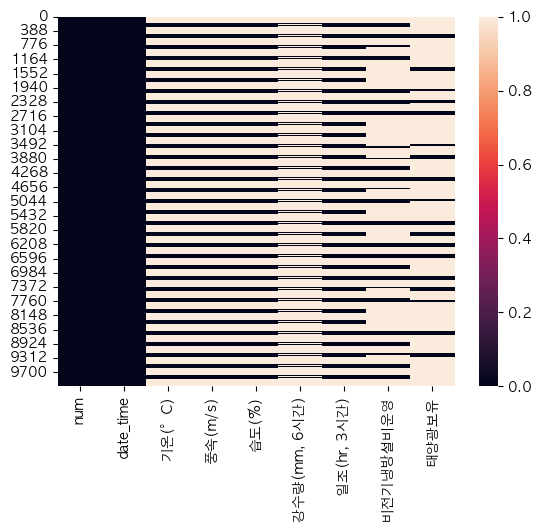

In [38]:
sns.heatmap(data=df1.isna())